In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copy dataset from Google Drive to Colab local storage for faster access
!cp -r "/content/drive/MyDrive/digit_recognizer/dataset" "/content/dataset"

# Define paths for training and testing files
train_data_path  = '/content/dataset/train.csv'
data_data_path  = '/content/dataset/test.csv'

In [ ]:
df = pd.read_csv(train_data_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


The first column, called "**label**", is the digit that was drawn by the user.

Each image is 28 pixels in height and 28 pixels in width, for a total of **784 pixels** in total.

In [76]:
# Convert DataFrame to NumPy array
data = np.array(df)

# Get the number of samples (m) and features (n = 1 label + 784 pixel values)
m, n = data.shape

# Shuffle the dataset rows to ensure randomness in train/dev split
np.random.shuffle(data)

# ======================= Development Set =======================
# Select first 1000 samples and transpose
data_dev = data[:1000].T   # (shape: 785 x 1000)
Y_dev = data_dev[0]        # Row 0 contains labels
X_dev = data_dev[1:n]      # Rows 1 to 784 contain pixel values
X_dev = X_dev / 255.

# ========================= Training Set ========================
# Use the remaining samples and transpose
data_train = data[1000:].T # (shape: 785 x (m - 1000))
Y_train = data_train[0]    # Row 0 contains labels
X_train = data_train[1:n]  # Rows 1 to 784 contain pixel values
X_train = X_train / 255.


In [80]:
def init_params():
    # Initialize weights and biases for the neural network
    W1 = np.random.rand(10, 784)  * 0.01  # Weights for layer 1 (10 x 784)
    b1 = np.random.rand(10, 1)            # Biases for layer 1 (10 x 1)
    W2 = np.random.rand(10, 10)  * 0.01   # Weights for layer 2 (10 x 10)
    b2 = np.random.rand(10, 1)            # Biases for layer 2 (10 x 1)
    return W1, b1, W2, b2

def ReLU(Z):
    # Apply ReLU activation function
    return np.maximum(0, Z)

def softmax(Z):
    # Apply softmax activation function for output layer
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # ✅ stability
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    # Perform forward propagation through the network
    Z1 = W1.dot(X) + b1  # Linear transformation for layer 1
    A1 = ReLU(Z1)        # Apply ReLU activation
    Z2 = W2.dot(A1) + b2 # Linear transformation for layer 2
    A2 = softmax(Z2)     # Apply softmax activation
    return Z1, A1, Z2, A2

def one_hot(Y):
    # Convert labels to one-hot encoded vectors
    return np.eye(10)[Y].T  # (10 x m)

def deriv_ReLU(Z):
    # Derivative of ReLU activation function
    return Z > 0  # Returns boolean mask

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    # Perform backpropagation to compute gradients
    m = Y.size
    one_hot_Y = one_hot(Y)                      # Convert labels to one-hot encoding
    dZ2 = A2 - one_hot_Y                        # Gradient of loss w.r.t Z2
    dW2 = 1/m * dZ2.dot(A1.T)                   # Gradient of loss w.r.t W2
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)  # Gradient of loss w.r.t b2
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)        # Gradient of loss w.r.t Z1
    dW1 = 1/m * dZ1.dot(X.T)                    # Gradient of loss w.r.t W1
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)  # Gradient of loss w.r.t b1
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # Update parameters using gradient descent
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2


In [79]:
def get_predictions(A2):
  # Get the index of the maximum value in each column (predicted class)
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  # Calculate the accuracy by comparing predictions with true labels
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
  # Initialize weights and biases
  W1, b1, W2, b2 = init_params()

  # Perform gradient descent for the specified number of iterations
  for i in range(iterations):
    # Forward propagation to compute activations
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)

    # Backpropagation to compute gradients
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)

    # Update parameters using the computed gradients
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

    # Print progress every 50 iterations
    if i % 50 == 0:
      print("Iteration: ", i)
      print("Accuracy : ", get_accuracy(get_predictions(A2), Y))

  # Return the updated weights and biases
  return W1, b1, W2, b2


In [82]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
Accuracy :  0.097
Iteration:  50
Accuracy :  0.20468292682926828
Iteration:  100
Accuracy :  0.40387804878048783
Iteration:  150
Accuracy :  0.7071463414634146
Iteration:  200
Accuracy :  0.7996829268292683
Iteration:  250
Accuracy :  0.8366341463414634
Iteration:  300
Accuracy :  0.8596341463414634
Iteration:  350
Accuracy :  0.8735609756097561
Iteration:  400
Accuracy :  0.882390243902439
Iteration:  450
Accuracy :  0.888219512195122


In [83]:
def make_predictions(X, W1, b1, W2, b2):
    # Perform forward propagation to compute the output activations
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)

    # Get the predicted labels from the output activations
    return get_predictions(A2)

def test_prediction(index, W1, b1, W2, b2):
    # Get the input image vector and true label at the specified index
    image_vector = X_train[:, index, None]      # Extract the image vector (shape: 784 x 1)
    true_label = Y_train[index]                 # Extract the true label (scalar)

    # Predict the digit using the trained model
    predicted_label = make_predictions(image_vector, W1, b1, W2, b2)[0]

    # Reshape the flat image vector back to a 28x28 matrix for visualization
    image_2D = image_vector.reshape(28, 28) * 255  # Scale pixel values back to 0-255

    # Display the image along with the true and predicted labels
    plt.gray()  # Set the colormap to grayscale
    plt.imshow(image_2D, interpolation='nearest')  # Show the image
    plt.title(f"Label: {true_label}  |  Predicted: {predicted_label}")  # Add title
    plt.axis('off')  # Turn off the axes for better visualization
    plt.show()


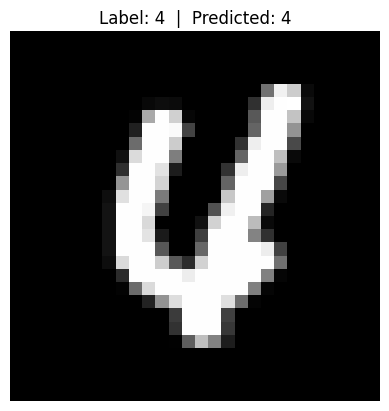

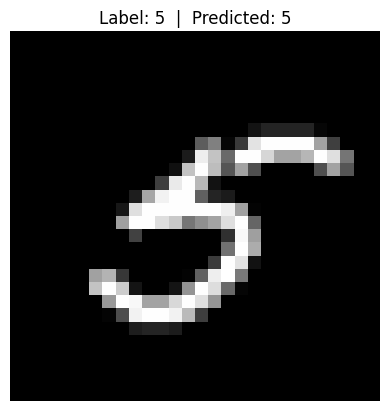

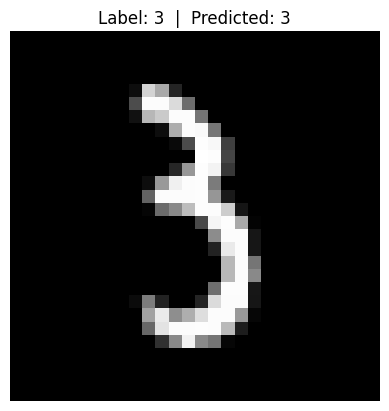

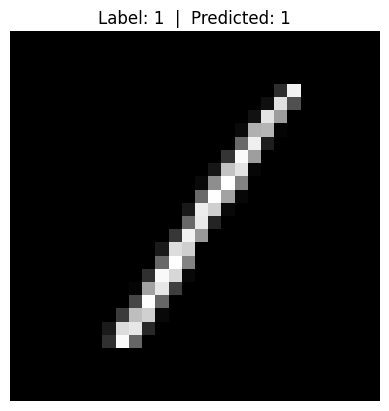

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(4, W1K, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)

In [85]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

np.float64(0.905)

In [86]:
np.savez("text_classifier_model_scratch", W1=W1, b1=b1, W2=W2, b2=b2)

In [87]:
from google.colab import files
files.download("text_classifier_model_scratch.npz")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>